In [3]:
from math import exp
import matplotlib.pyplot as plt
import const

# argument functions
def factorial(n):
    fact = 1
    for i in range (1,int(n)+1):
        fact = fact * i
    return fact

In [4]:
# JHBV Ar potential Mol. Phys. 107:20, 2181-2188 (2009), note there's an error in C16. Corrected here.
# length in nm and energy in K
def Ar_JHBV(R):
    A =    4.61330146E7
    a1 =  -2.98337630E1
    # a1 =   2.98337630
    a2 =  -9.71208881
    # a2 =   9.71208881E-2
    a_1 =  2.75206827E-2
    # a_1 =  2.75206827E-1
    a_2 = -1.01489050E-2
    # a_2 = -1.01489050
    b =    4.02517211E1
    # b =    4.02517211
    C =   [4.42812017E-1, # C6
           3.26707684E-2, # C8
           2.45656537E-3, # C10
           1.88246247E-4, # C12
           1.47012192E-5, # C14
           1.17006343E-6] # C16
           # 1.70063432E-6 # C16 paper value
    eps  = 143.12
    Reps = 0.3762
    sig  = 0.3357
    R2 = R*R
    Vexp = A * exp(a1*R + a2*R2 + a_1/R + a_2/R2)
    Vpoly = 0
    for iN in range(3,9):
        Vpoly += C[iN-3]/(R2**iN) * \
        (1 - exp(-b*R) * sum([(b*R)**ik/factorial(ik) for ik in range(0,2*iN+1)]))
    V_Ar = Vexp-Vpoly
    return V_Ar

In [3]:
# Waldrop et al. Kr potential, JCP 142, 204307 (2015) 
# Energy in Hartree and distance in a_0
def Kr_Waldrop(R):
    A =  467.771557
    B =  -43.111875
    C = -509.601417
    alpha = 1.566575
    beta  = 4.083794
    C_array = [
         126.790499, # C6
        5268.109217  # C8
    ]
    A_sh = 1296.0
    alpha_sh = 3.067950
    beta_sh  = 0.3240714
    
    R2 = R*R
    if R<3.40150703:
        V_Kr = (A_sh / R) * exp(-alpha_sh*R + beta_sh*R2)
    else:
        Vexp = (A + B*R + C/R) * exp(-alpha*R)
        Vpoly = 0
        for iN in range(3,5):
            Vpoly += C_array[iN-3]/(R2**iN) * \
            (1 - exp(-beta*R) * sum([(beta*R)**ik/factorial(ik) for ik in range(0,2*iN+1)]))
        V_Kr = Vexp-Vpoly
    return V_Kr

In [5]:
# JHBV Ne potential Mol. Phys. 106:1, 133-140 (2008).
# length in nm and energy in K
def Ne_JHBV(R):
    A =    4.02915058383E7
    a1 =  -4.28654039586E1
    a2 =  -3.33818674327
    a_1 = -5.34644860719E-2
    a_2 =  5.01774999419E-3
    b =    4.92438731676E1
    C =   [4.40676750157E-2, # C6
           1.64892507701E-3, # C8
           7.90473640524E-5, # C10
           4.85489170103E-6, # C12
           3.82012334054E-7, # C14
           3.85106552963E-8] # C16
    eps  = 42.152521
    Reps = 0.30894556
    sig  = 0.27612487
    R2 = R*R
    Vexp = A * exp(a1*R + a2*R2 + a_1/R + a_2/R2)
    Vpoly = 0
    for iN in range(3,9):
        Vpoly += C[iN-3]/(R2**iN) * \
        (1 - exp(-b*R) * sum([(b*R)**ik/factorial(ik) for ik in range(0,2*iN+1)]))
    V_Ne = Vexp-Vpoly
    return V_Ne

In [5]:
def Mie(x,sigma,eps,r):
    V_Mie = eps*(x[0]/(x[0]-x[1]))*(x[0]/x[1])**(x[1]/(x[0]-x[1]))*((sigma/r)**x[0]-(sigma/r)**x[1])
    return V_Mie

In [12]:
Ne_JHBV(0.3089)

-42.152483595951836

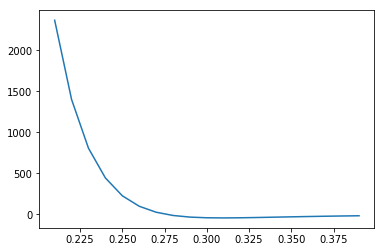

In [11]:
plt.plot([0.2+0.01*iR for iR in range(1,20)],[Ne_JHBV(0.2+0.01*iR) for iR in range(1,20)])

3.851065529645374e-08